# MRI Longitudinal Study

##Import Libraries & Modules

In [471]:
# Import modules and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Install and import Pingouin
!pip install pingouin
import pingouin as pg

# from google.colab import drive
# drive.mount('/content/drive')

## Raw Data & Description

In [472]:
# # Define file to load
# filename = '/content/drive/MyDrive/Academic/Master of Information/Year 2/Winter/INF2178 - Experimental Design for Data Science/INF2178_A4_data.csv'

# Define file to load -> Local
filename = 'INF2178_A4_data.csv'

# Store dataset in variables
df_raw = pd.read_csv(filename)

In [473]:
# Display raw dataset
df_raw

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


# Data Cleaning & Data Wrangling

In [474]:
# Display df details
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [475]:
# Define a list of columns to be dropped from the df
dropped_columns = ["Unnamed: 0", "MR Delay", "Hand"]

# Drop the specified columns from the raw df and assign the result to a new df
df = df_raw.drop(dropped_columns, axis=1)

In [476]:
demeted_subjects = df.loc[df['Group'] == 'Demented']
nondemeted_subjects = df.loc[df['Group'] == 'Nondemented']
converted_subjects = df.loc[df['Group'] == 'Converted']

In [477]:
# Display df statistics
df.describe()

,Visit,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,1.489796,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,0.500748,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,1.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,1.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,1.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,2.000000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,2.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


array([[<Axes: title={'center': 'Visit'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'EDUC'}>],
       [<Axes: title={'center': 'SES'}>,
        <Axes: title={'center': 'MMSE'}>,
        <Axes: title={'center': 'CDR'}>],
       [<Axes: title={'center': 'eTIV'}>,
        <Axes: title={'center': 'nWBV'}>,
        <Axes: title={'center': 'ASF'}>]], dtype=object)

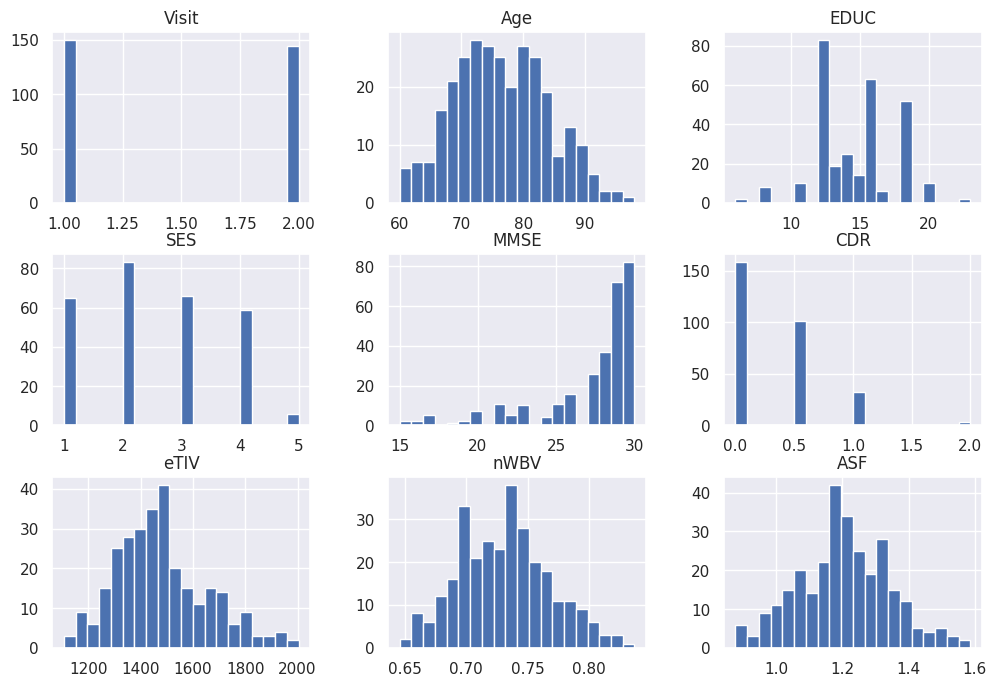

In [478]:
# Plot histograms for all numerical columns in the df
df.hist(figsize=(12,8), bins=20)

## Feature Cleaning

In [479]:
# Rename 'M/F' column to 'Sex'
df = df.rename(columns={'M/F': 'Gender'})

In [480]:
# Function to convert MRI ID group names to MR1 and MR2
def convert_mri_id(mri_id):
    mri_marker = int(mri_id[-1])
    new_name = 'MR1' if mri_marker == 1 else 'MR2'
    return new_name

# Apply the function to each element in 'MRI ID' column
df['MRI ID'] = df['MRI ID'].apply(convert_mri_id)

df

,Subject ID,MRI ID,Group,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,MR1,Nondemented,1,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,MR2,Nondemented,2,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,MR1,Demented,1,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,MR2,Demented,2,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,MR1,Nondemented,1,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,OAS2_0184,MR2,Demented,2,F,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,OAS2_0185,MR1,Demented,1,M,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,OAS2_0185,MR2,Demented,2,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,OAS2_0186,MR1,Nondemented,1,F,61,13,2.0,30.0,0.0,1319,0.801,1.331


## Removing Outliers

In [481]:
# This function remove outliers in selected columns of a df
def remove_outliers(df, columns):
  for column in columns:
    # Calculate the interquartile range (IQR) for the current column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN values
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
  return df

In [482]:
df = remove_outliers(df, ['nWBV'])

In [483]:
# Define df for socioeconomic analysis
df_ses = df.copy().dropna()

# Exploratory Data Analysis

In [484]:
df_eda = df.copy()

In [485]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors and their positions along the colormap
colors = [(0, '#FFFFFF'),
          (0.5, '#4a86e8'),
          (1, '#000000')]

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

<Axes: ylabel='Group'>

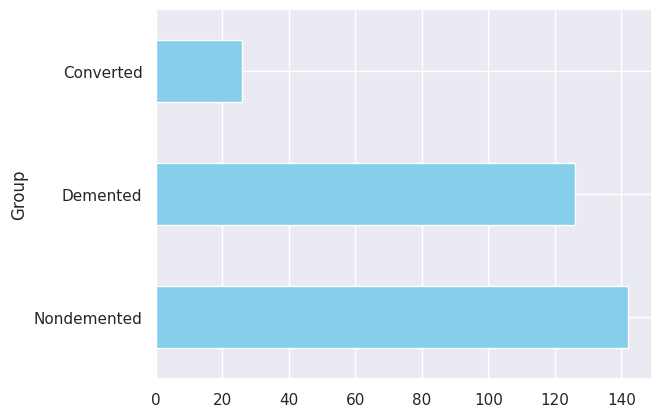

In [486]:
# Calculate the value counts of the Group column
subject_diagnosis = df_eda['Group'].value_counts()

# Display the value counts
subject_diagnosis

# Plot a horizontal bar plot of the value counts
subject_diagnosis.plot(kind='barh', color='skyblue')


<Axes: ylabel='SES'>

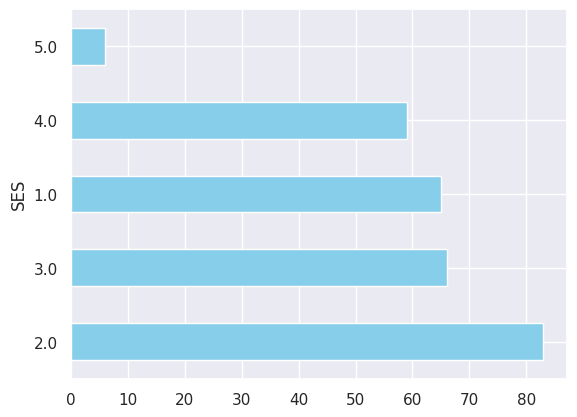

In [487]:
# Calculate the value counts of the 'SES' column and store it in 'ses_class'
ses_class = df_eda['SES'].value_counts()

# Display the value counts
ses_class

# Plot a horizontal bar plot of the value counts
ses_class.plot(kind='barh', color='skyblue')

In [488]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors and their positions along the colormap
colors = [(0, '#FFFFFF'),
          (0.5, '#4a86e8'),
          (1, '#000000')]

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

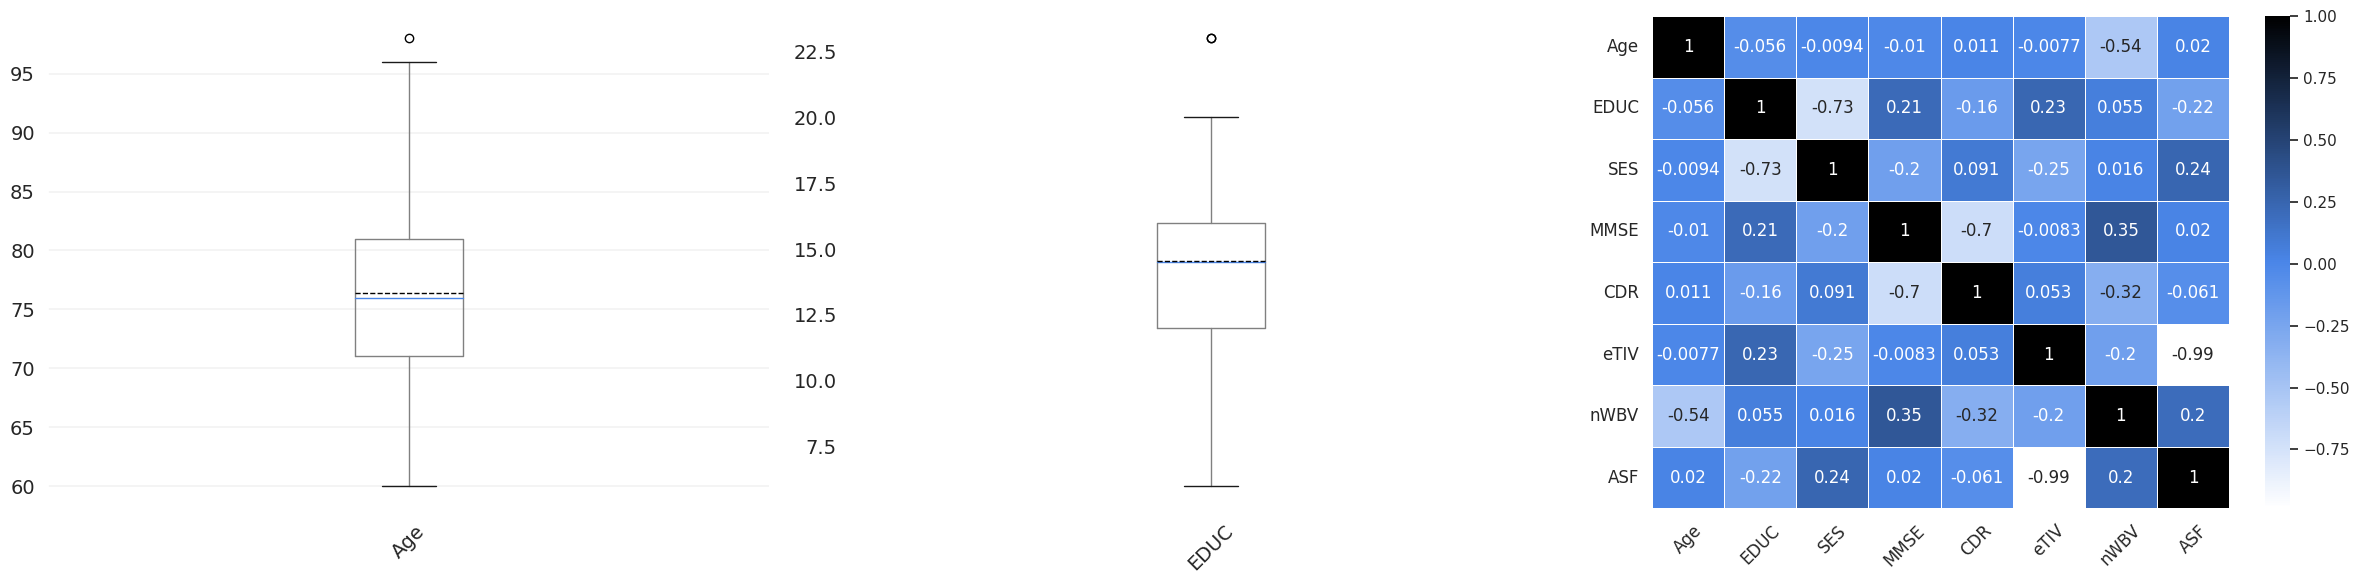

In [489]:
# Create subplots with one row and two columns
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Set facecolor of the subplots to white
for ax in axs:
    ax.set_facecolor('white')

# Remove top and right border from both subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove y-axis tick marks from both subplots
for ax in axs:
    ax.yaxis.set_ticks_position('none')

# Add gridlines in the y-axis for the boxplot
axs[0].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Plot the boxplot on the first subplot
df_eda[['Age']].boxplot(ax=axs[0],
          meanline=True,
          showmeans=True,
          showfliers=True,
          boxprops=dict(color='grey'),
          whiskerprops=dict(color='grey'),
          medianprops=dict(color='#4a86e8'),
          meanprops=dict(color='#000000'),
          fontsize=14,
           rot=45
        )

# Plot the boxplot on the 2nd subplot
df_eda[['EDUC']].boxplot(ax=axs[1],
          meanline=True,
          showmeans=True,
          showfliers=True,
          boxprops=dict(color='grey'),
          whiskerprops=dict(color='grey'),
          medianprops=dict(color='#4a86e8'),
          meanprops=dict(color='#000000'),
          fontsize=14,
           rot=45
        )

# Create and store the correlation matrix
correlation_matrix = df_eda[['Age', 'EDUC',	'SES',	'MMSE',	'CDR',	'eTIV',	'nWBV',	'ASF']].corr()

# Create a heatmap using seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, annot_kws={"size": 12}, ax=axs[2], cmap=custom_cmap)


# Adjust x-axis tick label size for the heatmap
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)

# Adjust y-axis tick label size for the heatmap
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


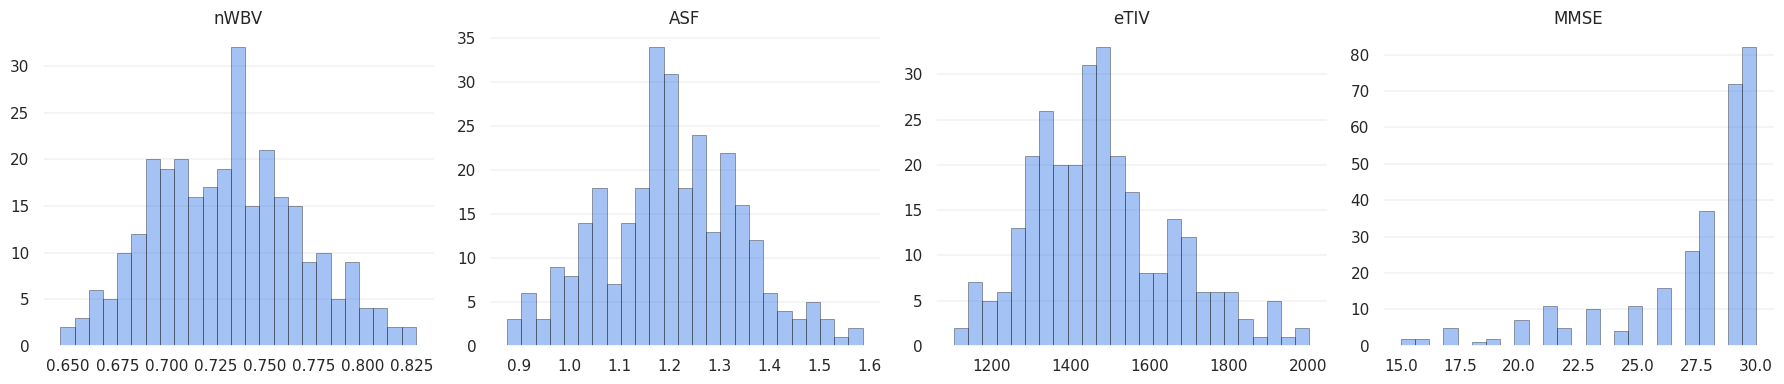

In [490]:
# Plot settings
fig, axs = plt.subplots(1, 4, figsize=(18, 4), facecolor='white')

# Remove top and right border from all subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axs:
    ax.set_facecolor('white')

# Remove y-axis tick marks from all subplots
for ax in axs:
    ax.yaxis.set_ticks_position('none')

# Add gridlines in the y-axis for all subplots
for ax in axs:
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Plot histograms
df_eda[['nWBV', 'ASF', 'eTIV', 'MMSE']].hist(ax=axs, figsize=(16, 6), bins=25, color=['#4a86e8'], alpha=.5, edgecolor='black', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()


In [491]:
# Filter the df
df_demented = df[df['Group'] == 'Demented']

# Display the filtered df
df_demented

,Subject ID,MRI ID,Group,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,MR1,Demented,1,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,MR2,Demented,2,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
8,OAS2_0007,MR1,Demented,1,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0009,MR1,Demented,1,M,68,12,2.0,27.0,0.5,1457,0.806,1.205
12,OAS2_0009,MR2,Demented,2,M,69,12,2.0,24.0,0.5,1480,0.791,1.186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,OAS2_0182,MR1,Demented,1,M,73,12,NaN,23.0,0.5,1661,0.698,1.056
288,OAS2_0184,MR1,Demented,1,F,72,16,3.0,24.0,0.5,1354,0.733,1.296
289,OAS2_0184,MR2,Demented,2,F,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,OAS2_0185,MR1,Demented,1,M,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [492]:
# Filter the df
df_converted = len(df[df['Group'] == 'Converted'])

# Display the filtered df
df_converted

26

# Research Question #1


**Research Question 1: How does diagnosis status (Demented/Nondemented) influence the brain over time?**


*   DV = nWBV
*   IV Between-subjects factor = Group
*   IV within-subjects factor = Visit

In [493]:
# Define variables
subject_id = 'Subject ID'          # Name of the subject ID column
dependent_variable = 'nWBV'        # Name of the dependent variable
between_factor = 'Group'           # Name of the between-subject factor
within_factor = 'Visit'            # Name of the within-subject factor


In [494]:
# Select columns from df where the 'Group' column is not equal to 'Converted'
# Remove rows with missing values and make a copy of the resulting df
df_r1 = df[[subject_id, between_factor, within_factor, dependent_variable]][df[between_factor] != 'Converted'].dropna().copy()

In [495]:
# Sort the DataFrame df_r1
df_r1.sort_values(by=[between_factor, subject_id, within_factor], inplace=True)

In [496]:
# Reset the index
df_r1.reset_index(drop=True, inplace=True)

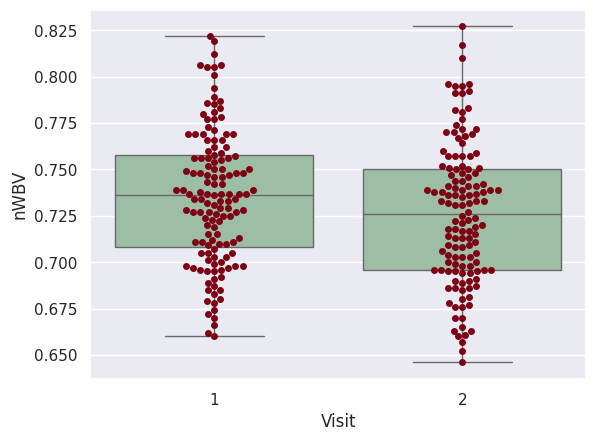

In [497]:
# Create a boxplot
ax = sns.boxplot(x=within_factor, y=dependent_variable, data=df_r1, color='#99c2a2')

# Overlay a swarmplot to show individual data points
ax = sns.swarmplot(x=within_factor, y=dependent_variable, data=df_r1, color='#7d0013')

In [498]:
# Perform mixed ANOVA analysis
aov = pg.mixed_anova(data=df_r1, dv=dependent_variable, within=within_factor, between=between_factor, subject=subject_id)

# Print ANOVA table
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.029      1    129  0.029  12.263    0.001  0.087  nan
Visit        0.006      1    129  0.006  80.305    0.000  0.384    1.000
Interaction  0.000      1    129  0.000   2.538    0.114  0.019  nan



In [499]:
# Perform paired t-tests with FDR-BH corrections for post hoc analysis
post_hocs = pg.pairwise_ttests(data=df_r1, dv=dependent_variable,
                               within=within_factor,
                               between=between_factor,
                               subject=subject_id,
                               padjust='fdr_bh')

# Print the post hoc tests results
pg.print_table(post_hocs)


/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A         B            Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust                 BF10    hedges
-------------  -------  --------  -----------  --------  ------------  ------  -------  -------------  -------  --------  ----------  -----------------  --------
Visit          -        1         2            True      True           8.909  130.000  two-sided        0.000   nan      nan         1617000000000.000     0.253
Group          -        Demented  Nondemented  False     True          -3.531  128.734  two-sided        0.001   nan      nan                    45.890    -0.609
Visit * Group  1        Demented  Nondemented  False     True          -3.248  128.422  two-sided        0.001     0.001  fdr_bh                 20.163    -0.560
Visit * Group  2        Demented  Nondemented  False     True          -3.702  129.000  two-sided        0.000     0.001  fdr_bh                 77.768    -0.640



<ipython-input-500-cb61cfc2a064>:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.pointplot(data=df_r1,           # Data to plot


<Axes: xlabel='Visit', ylabel='nWBV'>

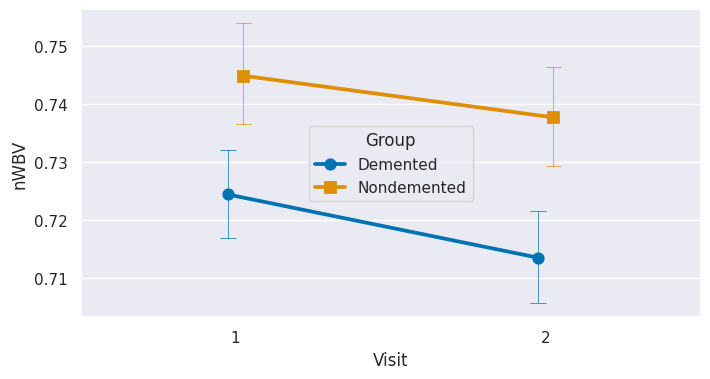

In [500]:
# Create a larger canvas
plt.figure(figsize=(8, 4))

# Plot data
sns.set()  # Set seaborn style
sns.pointplot(data=df_r1,           # Data to plot
              x=within_factor,      # Data for x-axis
              y=dependent_variable, # Data for y-axis
              hue=between_factor,   # Grouping variable for color
              dodge=True,           # Separate the data points for better visibility
              markers=['o', 's', 'v', 'p'],  # Markers for each group
              capsize=.05,          # Size of caps on error bars
              errwidth=.5,          # Width of error bars
              palette='colorblind'  # Color palette
             )


<ipython-input-501-7d037f5437a3>:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.9}` instead.

  sns.pointplot(data=df_r1, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's'], capsize=.05, errwidth=.9, palette='colorblind', ax=axes[1])


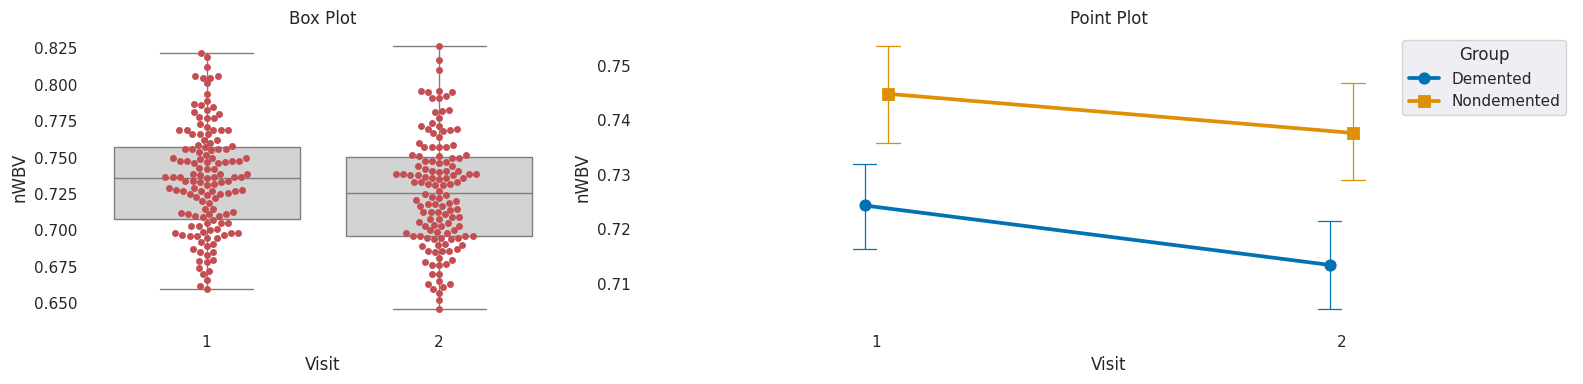

In [501]:
# Create a larger canvas with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='white', gridspec_kw={'width_ratios': [1, 2]})

# Box Plot
sns.boxplot(x='Visit', y='nWBV', data=df_r1, color='#D3D3D3', ax=axes[0])
sns.swarmplot(x='Visit', y='nWBV', data=df_r1, color='r', ax=axes[0])
axes[0].set_facecolor('white')  # Set background color to white

# Customize the first plot
axes[0].set_title('Box Plot')
axes[0].set_ylabel('nWBV')
axes[0].set_xlabel('Visit')

# Plot the data - Point Plot
sns.set()
sns.pointplot(data=df_r1, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's'], capsize=.05, errwidth=.9, palette='colorblind', ax=axes[1])
axes[1].set_facecolor('white')  # Set background color to white

# Customize the second plot
axes[1].set_title('Point Plot')
axes[1].set_ylabel('nWBV')
axes[1].set_xlabel('Visit')

plt.tight_layout()
plt.show()


## R1 Assumptions

In [502]:
# Assumption #1
# Mauchly's Test of Spericity
pg.sphericity(data=df_r1, dv=dependent_variable, within=within_factor, subject=subject_id)[-1]

1.0

In [503]:
# Assumption #1
# Test of Normality
pg.normality(data=df_r1, dv=dependent_variable, group=between_factor)

,W,pval,normal
Group,,,
Demented,0.990468,0.540290,True
Nondemented,0.987368,0.226399,True


# Research Question #2


**Research Question 2: How does gender influence changes in demented patients’ brain volume over time?**



*   DV = nWBV
*   IV Between-subjects factor = Gender
*   IV within-subjects factor = Visit





In [504]:
# Define variables
subject_id = 'Subject ID'          # Name of the subject ID column
dependent_variable = 'ASF'         # Name of the dependent variable
between_factor = 'Gender'          # Name of the between-subject factor
within_factor = 'Visit'            # Name of the within-subject factor


In [505]:
# Select relevant columns from the df_demented and drop NaN
df_r2 = df_demented[[subject_id, between_factor, within_factor, dependent_variable]].dropna().copy()

In [506]:
# Sort df
df_r2.sort_values(by=[between_factor, subject_id, within_factor], inplace=True)

In [507]:
# Reset the index
df_r2.reset_index(drop=True, inplace=True)

In [508]:
# Drop rows where the value in the 'Gender' column equals 5.0
df_r2.drop(df_r2.loc[df_r2[between_factor] == 5.0].index, inplace=True)

# Display df
df_r2

,Subject ID,Gender,Visit,ASF
0,OAS2_0010,F,1,1.213
1,OAS2_0010,F,2,1.184
2,OAS2_0023,F,1,1.407
3,OAS2_0023,F,2,1.405
4,OAS2_0039,F,1,1.495
...,...,...,...,...
121,OAS2_0179,M,2,1.128
122,OAS2_0182,M,1,1.056
123,OAS2_0182,M,2,1.061
124,OAS2_0185,M,1,1.030


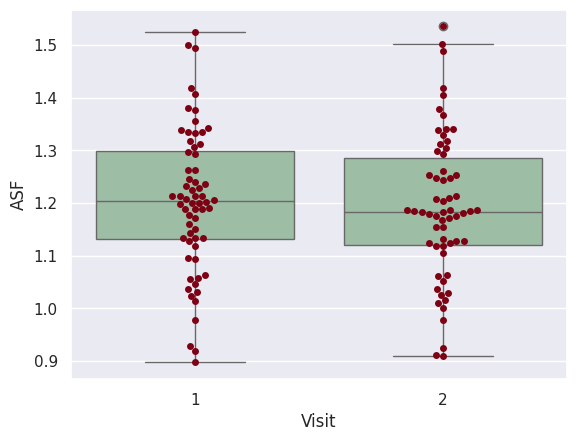

In [509]:
# Create a boxplot
ax = sns.boxplot(x=within_factor, y=dependent_variable, data=df_r2, color='#99c2a2')

# Overlay a swarmplot to show individual data points
ax = sns.swarmplot(x=within_factor, y=dependent_variable, data=df_r2, color='#7d0013')

In [510]:
# Perform mixed ANOVA analysis
aov = pg.mixed_anova(data=df_r2, dv=dependent_variable, within=within_factor, between=between_factor, subject=subject_id)

# Print ANOVA table
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Gender       0.711      1     60  0.711  26.487    0.000  0.306  nan
Visit        0.003      1     60  0.003   5.301    0.025  0.081    1.000
Interaction  0.000      1     60  0.000   0.177    0.675  0.003  nan



In [511]:
# Perform paired t-tests with FDR-BH corrections for post hoc analysis
post_hocs = pg.pairwise_ttests(data=df_r2, dv=dependent_variable,
                               within=within_factor,
                               between=between_factor,
                               subject=subject_id,
                               padjust='fdr_bh')

# Print the post hoc tests results
pg.print_table(post_hocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast        Visit    A    B    Paired    Parametric        T     dof  alternative      p-unc    p-corr  p-adjust        BF10    hedges
--------------  -------  ---  ---  --------  ------------  -----  ------  -------------  -------  --------  ----------  --------  --------
Visit           -        1    2    True      True          2.318  61.000  two-sided        0.024   nan      nan            1.650     0.073
Gender          -        F    M    False     True          5.140  57.428  two-sided        0.000   nan      nan         4724.372     1.297
Visit * Gender  1        F    M    False     True          5.203  57.581  two-sided        0.000     0.000  fdr_bh      5827.682     1.312
Visit * Gender  2        F    M    False     True          4.962  57.136  two-sided        0.000     0.000  fdr_bh      2631.553     1.254



<ipython-input-512-58da3e16153a>:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.pointplot(data=df_r2,           # Data to plot


<Axes: xlabel='Visit', ylabel='ASF'>

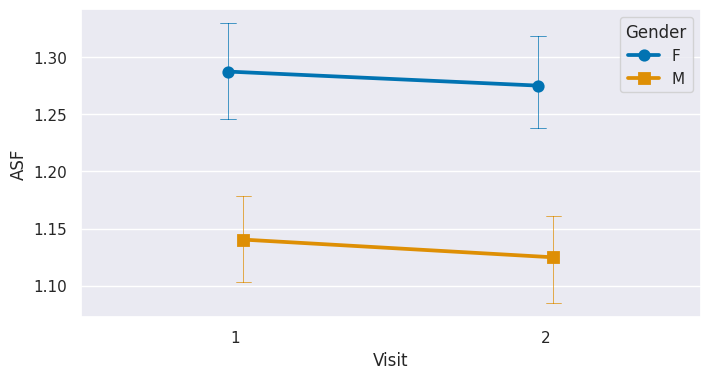

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger canvas
plt.figure(figsize=(8, 4))

# Plot data
sns.set()
sns.pointplot(data=df_r2,           # Data to plot
              x=within_factor,      # Data for x-axis
              y=dependent_variable, # Data for y-axis
              hue=between_factor,   # Grouping variable for color
              dodge=True,           # Separate the data points for better visibility
              markers=['o', 's', 'v', 'p'],  # Markers for each group
              capsize=.05,          # Size of caps on error bars
              errwidth=.5,          # Width of error bars
              palette='colorblind'  # Color palette
             )


## R2 Assumptions

In [513]:
# Assumption #1
# Mauchly's Test of Spericity
pg.sphericity(data=df_r2, dv=dependent_variable, within=within_factor, subject=subject_id)[-1]

1.0

In [514]:
# Assumption #2
# Test of Normality
pg.normality(data=df_r2, dv=dependent_variable, group=between_factor)

,W,pval,normal
Gender,,,
F,0.952892,0.028693,False
M,0.971517,0.111066,True


#Statistical Power Plot

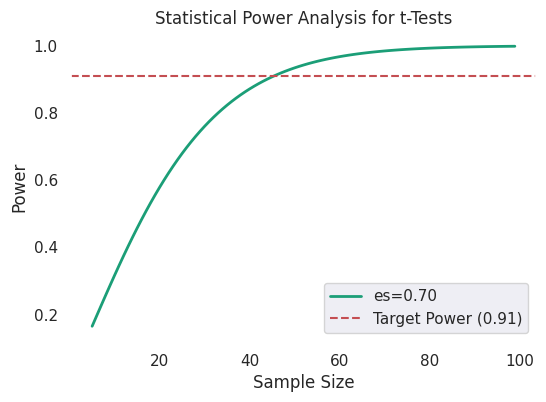

Approx. sample size: 46


In [515]:
from statsmodels.stats.power import TTestIndPower

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Define parameters
alpha = 0.05
power = 0.91
effect_size = [0.7]

# Generate sample sizes
sample_sizes = np.array(range(5, 100))

# Plot power curves
ttp = TTestIndPower()
ttp.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_size, alpha=alpha, alternative='two-sided', ax=ax)
ax.axhline(y=power, color='r', linestyle='--', label=f'Target Power ({power})')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Power')
ax.set_title('Statistical Power Analysis for t-Tests')
ax.legend()
ax.grid(True)

# Set the background color of the figure and axes to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.show()

# Calculate the appropriate sample size
appropriate_sample_size = ttp.solve_power(effect_size=effect_size[0], alpha=alpha, power=power, ratio=1, alternative='two-sided')
print(f"Approx. sample size: {int(np.ceil(appropriate_sample_size))}")
